## Pytorch로 Logistic Regression 구현

In [1]:
import torch

# 학습 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]) # 12 * 1
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]]) # 12 * 1

In [ ]:
# W, b 초기화 및 Learning Rate 설정
W = torch.zeros(1, 1) # x_train이 1차원이므로 [1, 1] 사이즈로 W를 초기화
b = torch.zeros(1, 1)

lr = 1.0

# 반복횟수 설정 및 W와 b의 requires_grad를 True로 설정
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  cost.backward()
  
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406926
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773751
epoch: 300, cost: 0.390820, W: -2.174323, b: 6.609555
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191601
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587361
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971980, b: 9.004181
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381527, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

- Pytorch를 이용하여 Logistic Regression을 직접 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))  

tensor([[0.],
        [1.]])


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_gd, b_gd = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

## 여러가지 Optimizer 사용해보기

### torch.optim
- `torch.optim`은 다양한 최적화 알고리즘을 수행해주는 Pytorch 패키지이다.
- 유용하게 사용되는 최적화 알고리즘들이 구현되어 있어 자유롭게 사용할 수 있고, 보다 정교한 알고리즘이 구현되면 이 또한 쉽게 추가될 수 있다.
- `Optimizer`를 사용하기 위해서는 현재 상태의 파라미터들을 입력하여 optimizer 객체를 생성하면 되고, 이 때 입력된 파라미터들은 optimizer에 의해 계산된 그레디언트를 기반으로 업데이트된다.
- optimizer 객체를 생성할 때 iterable한 파라미터를 입력하여야 하고, learning rate나 weight decay와 같은 optimizer와 관련된 옵션들도 지정할 수 있다.
- 이번 실습에서 사용해볼 `Optimizer`들은 다음과 같다.
  
  - `torch.optim.SGD`
  - `torch.optim.Adam`
  - `torch.optim.Adadelta`
  - `torch.optim.Adagrad`
  - `torch.optim.RMSprop`

#### 1. SGD optimizer
- 확률적 경사하강법(Stochastic gradient descent)을 통해 가중치 최적화를 수행하는 optimizer이다.

In [ ]:
# W, b 초기화 및 requires_grad를 True로 설정
W = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

# SGD optimizer 객체 생성
optimizer = torch.optim.SGD([W, b], lr=1.0)

# 반복횟수 설정
for epoch in range(3001):
  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis) 
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  optimizer.zero_grad() # 경사를 계산하기 전에 지금까지 계산된 경사를 지워준다.
                        # 이를 통해 epoch마다 새로운 경사를 계산하기 때문에
                        # W와 b를 for문 내에서 requires_grad_(True)로 따로 지정하지 않고,
                        # 초기화 시 함께 지정해도 된다.
  cost.backward()       # 경사를 계산한다.
  optimizer.step()      # .backward()를 통해 계산된 경사를 이용하여 
                        # 가중치들을 새로운 가중치로 갱신한다.

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406926
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773751
epoch: 300, cost: 0.390820, W: -2.174323, b: 6.609555
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191601
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587361
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971980, b: 9.004181
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381527, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

- 이번에는 SGD optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.
- 또한 Logistic Regression을 직접 구현한 코드도 SGD optimizer와 같은 경사하강법을 구현한 것이기 때문에 epoch가 증가함에 따라 cost 값이 동일한 값으로 줄어든 것을 알 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_SGD, b_SGD = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

#### 2. Adam optimizer
- Adam: A Method for Stochastic Optimization에서 고안된 Adam 알고리즘을 통해 가중치 최적화를 수행하는 optimizer이다.

In [ ]:
# W, b 초기화 및 requires_grad를 True로 설정
W = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

# Adam optimizer 객체 생성
optimizer = torch.optim.Adam([W, b], lr=1.0)

# 반복횟수 설정
for epoch in range(3001):
  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis) 
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -1.000000, b: 1.000000
epoch: 100, cost: 0.381568, W: -3.009527, b: 9.125643
epoch: 200, cost: 0.381491, W: -3.102716, b: 9.394312
epoch: 300, cost: 0.381491, W: -3.103856, b: 9.397764
epoch: 400, cost: 0.381491, W: -3.103853, b: 9.397751
epoch: 500, cost: 0.381491, W: -3.103852, b: 9.397751
epoch: 600, cost: 0.381491, W: -3.103852, b: 9.397751
epoch: 700, cost: 0.381491, W: -3.103852, b: 9.397751
epoch: 800, cost: 0.381491, W: -3.103851, b: 9.397750
epoch: 900, cost: 0.381491, W: -3.103852, b: 9.397750
epoch: 1000, cost: 0.381491, W: -3.103852, b: 9.397751
epoch: 1100, cost: 0.381491, W: -3.103852, b: 9.397752
epoch: 1200, cost: 0.381491, W: -3.103852, b: 9.397752
epoch: 1300, cost: 0.381491, W: -3.103852, b: 9.397752
epoch: 1400, cost: 0.381491, W: -3.103852, b: 9.397752
epoch: 1500, cost: 0.381491, W: -3.103852, b: 9.397752
epoch: 1600, cost: 0.381491, W: -3.103712, b: 9.397890
epoch: 1700, cost: 0.381497, W: -3.082275, b: 9.350801
epoch: 1800, cost: 0.3

- 이번에는 Adam optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.
- SGD optimizer의 cost 값과 비교해보면, Adam optimizer를 사용했을 때의 cost 값이 더 빨리 수렴(epoch가 더 작을 때 수렴)하는 것을 알 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_Adam, b_Adam = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

#### 3. Adadelta optimizer
- ADADELTA: An Adaptive Learning Rate Method에서 고안된 Adadelta 알고리즘을 통해 가중치 최적화를 수행하는 optimizer이다.

In [ ]:
# W, b 초기화 및 requires_grad를 True로 설정
W = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

# Adadelta optimizer 객체 생성
optimizer = torch.optim.Adadelta([W, b], lr=1.0)

# 반복횟수 설정
for epoch in range(3001):
  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis) 
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -0.003162, b: 0.003160
epoch: 100, cost: 0.632084, W: -0.202549, b: 0.469101
epoch: 200, cost: 0.579402, W: -0.372944, b: 0.996084
epoch: 300, cost: 0.537192, W: -0.537830, b: 1.522116
epoch: 400, cost: 0.504296, W: -0.698524, b: 2.036053
epoch: 500, cost: 0.478509, W: -0.857097, b: 2.540155
epoch: 600, cost: 0.458038, W: -1.015019, b: 3.038625
epoch: 700, cost: 0.441618, W: -1.173147, b: 3.534262
epoch: 800, cost: 0.428366, W: -1.331803, b: 4.028252
epoch: 900, cost: 0.417649, W: -1.490835, b: 4.520363
epoch: 1000, cost: 0.409003, W: -1.649656, b: 5.009082
epoch: 1100, cost: 0.402074, W: -1.807265, b: 5.491658
epoch: 1200, cost: 0.396584, W: -1.962220, b: 5.964027
epoch: 1300, cost: 0.392307, W: -2.112598, b: 6.420691
epoch: 1400, cost: 0.389052, W: -2.255958, b: 6.854593
epoch: 1500, cost: 0.386648, W: -2.389365, b: 7.257200
epoch: 1600, cost: 0.384936, W: -2.509623, b: 7.619216
epoch: 1700, cost: 0.383766, W: -2.613942, b: 7.932578
epoch: 1800, cost: 0.3

- 이번에는 Adadelta optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.
- Adalelta optimizer는 다른 optimizer와 비교했을 때 비교적 cost 값이 느리게 수렴되는 것을 확인할 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_Adadelta, b_Adadelta = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

#### 4. Adagrad optimizer
-  Adaptive Subgradient Methods for Online Learning and Stochastic Optimization에서 고안된 Adagrad 알고리즘을 통해 가중치 최적화를 수행하는 optimizer이다.

In [ ]:
# W, b 초기화 및 requires_grad를 True로 설정
W = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

# Adagrad optimizer 객체 생성
optimizer = torch.optim.Adagrad([W, b], lr=1.0)

# 반복횟수 설정
for epoch in range(3001):
  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis) 
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -1.000000, b: 1.000000
epoch: 100, cost: 0.405247, W: -1.730439, b: 5.273878
epoch: 200, cost: 0.390935, W: -2.168449, b: 6.598612
epoch: 300, cost: 0.386055, W: -2.427320, b: 7.376696
epoch: 400, cost: 0.383900, W: -2.600170, b: 7.894600
epoch: 500, cost: 0.382828, W: -2.722402, b: 8.260150
epoch: 600, cost: 0.382257, W: -2.811744, b: 8.527007
epoch: 700, cost: 0.381939, W: -2.878444, b: 8.726059
epoch: 800, cost: 0.381757, W: -2.928960, b: 8.876721
epoch: 900, cost: 0.381651, W: -2.967609, b: 8.991940
epoch: 1000, cost: 0.381588, W: -2.997399, b: 9.080716
epoch: 1100, cost: 0.381550, W: -3.020485, b: 9.149499
epoch: 1200, cost: 0.381527, W: -3.038452, b: 9.203017
epoch: 1300, cost: 0.381513, W: -3.052477, b: 9.244788
epoch: 1400, cost: 0.381505, W: -3.063455, b: 9.277478
epoch: 1500, cost: 0.381499, W: -3.072060, b: 9.303102
epoch: 1600, cost: 0.381496, W: -3.078817, b: 9.323221
epoch: 1700, cost: 0.381494, W: -3.084128, b: 9.339032
epoch: 1800, cost: 0.3

- 이번에는 Adagrad optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.
- Adagrad optimizer는 Adam optimizer까지는 아니지만, SGD optimizer보다는 빠르게 cost 값이 수렴되는 것을 확인할 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_Adagrad, b_Adagrad = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

#### 5. RMSprop optimizer
-  Generating Sequences With Recurrent Neural Networks에서 고안된 RMSprop 알고리즘을 통해 가중치 최적화를 수행하는 optimizer이다.

In [ ]:
# W, b 초기화 및 requires_grad를 True로 설정
W = torch.zeros(1, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

# Adagrad optimizer 객체 생성
optimizer = torch.optim.RMSprop([W, b], lr=0.005)

# 반복횟수 설정
for epoch in range(3001):
  # Hypothesis 및 cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis) 
      -(1  - y_train) * torch.log(1 - hypothesis)
      )

  # 경사 계산 및 W, b 업데이트
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 학습이 잘 되는지 확인하기 위한 내용 출력
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
        epoch, cost.item(), W.item(), b.item()))

epoch: 0, cost: 0.693147, W: -0.050000, b: 0.050000
epoch: 100, cost: 0.579496, W: -0.373216, b: 0.995313
epoch: 200, cost: 0.539217, W: -0.528673, b: 1.493348
epoch: 300, cost: 0.510307, W: -0.666085, b: 1.932197
epoch: 400, cost: 0.487530, W: -0.797299, b: 2.349908
epoch: 500, cost: 0.468949, W: -0.926560, b: 2.758655
epoch: 600, cost: 0.453517, W: -1.056444, b: 3.164007
epoch: 700, cost: 0.440596, W: -1.188194, b: 3.568298
epoch: 800, cost: 0.429708, W: -1.317695, b: 3.972607
epoch: 900, cost: 0.420530, W: -1.447801, b: 4.377043
epoch: 1000, cost: 0.412797, W: -1.578599, b: 4.781353
epoch: 1100, cost: 0.406297, W: -1.709876, b: 5.184982
epoch: 1200, cost: 0.400860, W: -1.841303, b: 5.587130
epoch: 1300, cost: 0.396343, W: -1.972451, b: 5.986755
epoch: 1400, cost: 0.392626, W: -2.102797, b: 6.382524
epoch: 1500, cost: 0.389610, W: -2.231698, b: 6.772724
epoch: 1600, cost: 0.387206, W: -2.358346, b: 7.155112
epoch: 1700, cost: 0.385338, W: -2.481687, b: 7.526662
epoch: 1800, cost: 0.3

- 이번에는 RMSprop optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 위의 결과를 보면, epoch가 증가할수록 cost의 값이 줄어드므로 훈련이 잘 진행되었다는 것을 알 수 있다.
- RMSprop optimizer를 사용할 때에는 다른 optimizer의 learning rate와 동일한 1.0으로 지정할 경우 훈련 도중에 cost, W, b가 NAN이 되어 이를 방지하기 위해 learning rate 값을 수정하였다.
- 다른 optimizer들과 epoch = 3000일 때의 cost 값을 비슷하게 만들기 위해서 여러번의 테스트를 통해 learning rate의 값을 0.005로 지정하였다.
- learning rate의 값이 작을수록 가중치가 갱신되는 정도가 줄어들고 이에 따라 cost 값이 느리게 수렴하게 된다.
- RMSprop optimizer의 learning rate는 다른 optimizer들의 learning rate보다 매우 작음에도 불구하고, epoch = 3000에서 비슷한 cost 값을 출력하는 것으로 보아 이번 문제에서의 RMSprop optimizer의 성능이 좋음을 알 수 있다.

In [ ]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


- 위의 결과를 보면, x = [4.5]일 때의 예측값은 y = 0, x = [1.1]일 때의 예측값은 y = 1을 출력함을 알 수 있다.

In [ ]:
W_RMSprop, b_RMSprop = W, b # matplotlib로 결과를 시각화하기 위해 가중치 저장

- 지금까지 5개의 optimizer를 이용하여 Logistic Regression을 구현해보았다.
- 각각의 optimizer에서 epoch = 3000일 때의 W와 b 값이 약간씩 다르긴 하지만, test 샘플을 입력하였을 때 모두 동일한 결과를 출력하는 것으로 보아 모든 optimizer가 적절한 가중치를 찾았다는 것을 알 수 있다.

## Matplotlib으로 결과 시각화

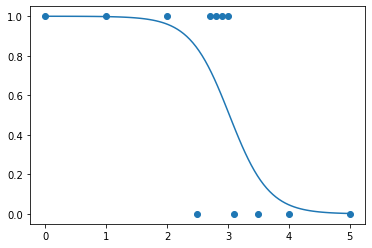

In [ ]:
# 기본 형태
import matplotlib.pyplot as plt
W.requires_grad_(False) # 더 이상 그레디언트 값을 계산하지 않아도 되므로
b.requires_grad_(False) # requires_grad를 False로 변경해준다.

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X, W) + b) # 여기서 W와 b는 logistic regression을 
                                      # 직접 구현하였을 때의 값에 해당한다.
plt.plot(X, Y)
plt.show()

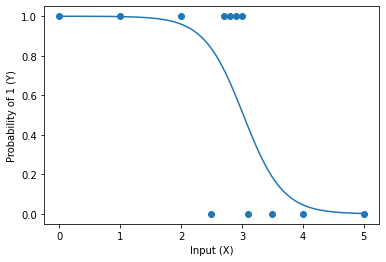

In [ ]:
# label 달기
plt.scatter(x_train, y_train)
plt.plot(X, Y)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.show()

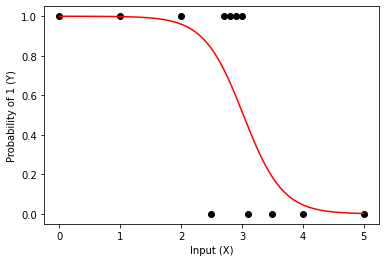

In [ ]:
# 점과 선의 색 변경하기
plt.scatter(x_train, y_train, c="black")

plt.plot(X, Y, c="#ff0000") # 여기서 #ff0000은 16진 색상코드에서 빨간색을 나타냄
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.show()

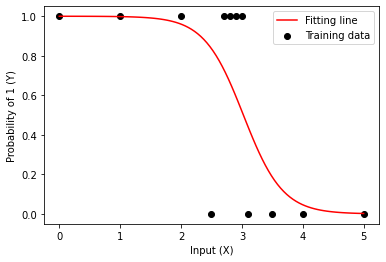

In [ ]:
# 범례 달기
plt.scatter(x_train, y_train, c="black", label="Training data")

plt.plot(X, Y, c="#ff0000", label="Fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.legend()
plt.show()

- SGD optimizer를 사용한 결과 시각화

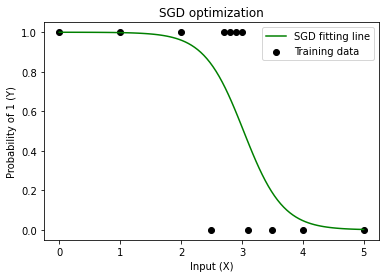

In [ ]:
W_SGD.requires_grad_(False)
b_SGD.requires_grad_(False)

Y_SGD = torch.sigmoid(torch.mm(X, W_SGD) + b_SGD)

plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y_SGD, c="#008000", label="SGD fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("SGD optimization")
plt.legend()
plt.show()

- Adam optimizer를 사용한 결과 시각화

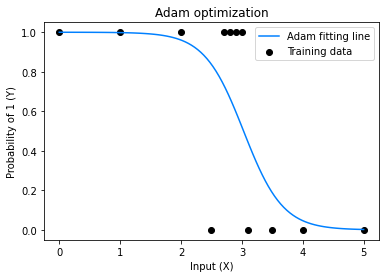

In [ ]:
W_Adam.requires_grad_(False)
b_Adam.requires_grad_(False)

Y_Adam = torch.sigmoid(torch.mm(X, W_Adam) + b_Adam)

plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y_Adam, c="#0080ff", label="Adam fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Adam optimization")
plt.legend()
plt.show()

- Adadelta optimizer를 사용한 결과 시각화

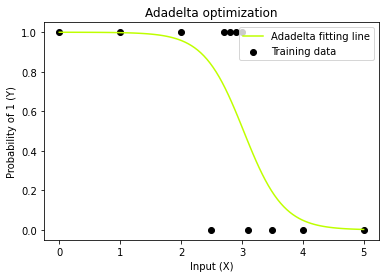

In [ ]:
W_Adadelta.requires_grad_(False)
b_Adadelta.requires_grad_(False)

Y_Adadelta = torch.sigmoid(torch.mm(X, W_Adadelta) + b_Adadelta)

plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y_Adadelta, c="#bfff00", label="Adadelta fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Adadelta optimization")
plt.legend(loc="upper right")
plt.show()

- Adagrad optimizer를 사용한 결과 시각화

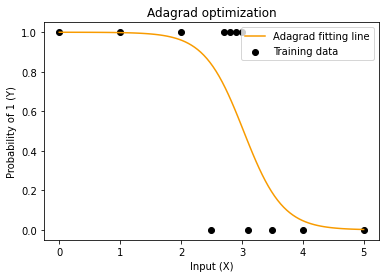

In [ ]:
W_Adagrad.requires_grad_(False)
b_Adagrad.requires_grad_(False)

Y_Adagrad = torch.sigmoid(torch.mm(X, W_Adagrad) + b_Adagrad)

plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y_Adagrad, c="#f89b00", label="Adagrad fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("Adagrad optimization")
plt.legend(loc="upper right")
plt.show()

- RMSprop optimizer를 사용한 결과 시각화

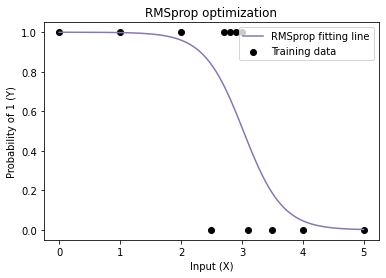

In [ ]:
W_RMSprop.requires_grad_(False)
b_RMSprop.requires_grad_(False)

Y_RMSprop = torch.sigmoid(torch.mm(X, W_RMSprop) + b_RMSprop)

plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X, Y_RMSprop, c="#8977ad", label="RMSprop fitting line")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("RMSprop optimization")
plt.legend(loc="upper right")
plt.show()

- 직접 구현한 logistic regression과 5개의 서로 다른 optimizer들을 사용하였을 때의 결과 동시 시각화

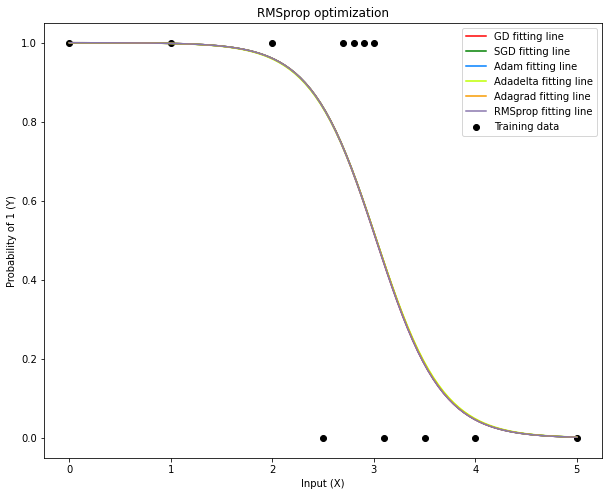

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train, c="black", label="Training data")

plt.plot(X, Y, c="#ff0000", label="GD fitting line")
plt.plot(X, Y_SGD, c="#008000", label="SGD fitting line")
plt.plot(X, Y_Adam, c="#0080ff", label="Adam fitting line")
plt.plot(X, Y_Adadelta, c="#bfff00", label="Adadelta fitting line")
plt.plot(X, Y_Adagrad, c="#f89b00", label="Adagrad fitting line")
plt.plot(X, Y_RMSprop, c="#8977ad", label="RMSprop fitting line")

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.title("RMSprop optimization")
plt.legend(loc="upper right")

plt.show()

- 시각화한 결과를 보면, Adadelta optimizer의 결과 그래프 외의 다른 결과들은 차이를 알 수 없을 정도로 겹쳐서 결과를 그린다는 것을 알 수 있다.
- epoch = 3000에서 Adadelta optimizer를 사용하였을 때의 cost 값이 다른 optimizer의 cost 값들보다 약간 큰 값을 가지기 때문에 그래프에서도 이러한 차이의 결과를 확인할 수 있다.
- 그래프를 보면 데이터에서 cost가 크다고 생각되는 샘플 외의 다른 샘플들에 대해서는 제대로 분류할 수 있음을 알 수 있고, epoch 값을 더 크게 할 경우 주어진 데이터에 더 잘 맞는 결과를 구할 수 있을 것으로 예상된다.